# Proceso estándar de regresión

1. Separar datos de entrenamiento / prueba
2. Normalizar datos / Crear un normalizador
3. Crear modelo (NN)
4. Entrenar
5. Evaluar resultados

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Red neuronal secuencial
from tensorflow.keras.models import Sequential
# Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
# Optimizador
from tensorflow.keras.optimizers import Adam

In [38]:
# asegurar que los resultados sean "reproducibles"
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)

### Datos de entrenamiento / prueba

In [39]:

x_train = pd.read_csv('insurancePre.csv')
x_test=x_train.sample(frac=0.2)
y_train = x_train.loc[:,'charges']
#seleciona la toda informacion sin la ultima columna MPG
x_train=x_train.iloc[:,0:7]



y_test = x_test.loc[:,'charges']
x_test=x_test.iloc[:,0:7]



### Normalización

In [40]:
def crear_normalizador(datos):
    normalizer = Normalization(axis=-1)
    normalizer.adapt(np.array(datos))
    return normalizer

In [41]:
normalizador = crear_normalizador(x_train)

### Creación Red Neuronal

In [42]:
def crear_nn_regresion(norm):
    model = Sequential([
        norm,
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(loss='mean_absolute_error', optimizer=Adam(0.001))
    return model

In [43]:
nn = crear_nn_regresion(normalizador)

### Entrenamiento del modelo

In [44]:
history = nn.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=1,
    epochs=300
)

Epoch 1/300
34/34 [==============================] - 1s 6ms/step - loss: 13212.3955 - val_loss: 13488.0391
Epoch 2/300
34/34 [==============================] - 0s 3ms/step - loss: 13154.9189 - val_loss: 13285.3594
Epoch 3/300
34/34 [==============================] - 0s 3ms/step - loss: 12185.3574 - val_loss: 10844.5049
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 8560.7402 - val_loss: 7239.7012
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 6451.1694 - val_loss: 5873.9443
Epoch 6/300
34/34 [==============================] - 0s 3ms/step - loss: 5121.3423 - val_loss: 4826.2246
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 4364.7529 - val_loss: 4404.4702
Epoch 8/300
34/34 [==============================] - 0s 3ms/step - loss: 4050.7935 - val_loss: 4238.3853
Epoch 9/300
34/34 [==============================] - 0s 3ms/step - loss: 3835.5964 - val_loss: 3999.5649
Epoch 10/300
34/34 [=============================

### Evaluar el rendimiento del modelo

In [45]:
nn.evaluate(x_test, y_test, verbose=1)

9/9 [==============================] - 0s 1ms/step - loss: 1407.5037


1407.503662109375

In [50]:
# Creación de predicciones
y_pred = nn.predict(x_test).flatten()


9/9 [==============================] - 0s 1ms/step
[ 7538.177   3266.2341  2864.3984  4473.9526 11706.704  10683.538
 13653.06    2080.1414 27719.922   4539.7085 11272.619  12011.222
 13384.678  13463.72   21218.838   6625.19    5308.3936  9819.271
  5377.5938  5343.      2058.8125  1647.58   10235.676  13015.695
 19466.418   7419.4023  1638.6444 47635.098   1185.4086 11462.3
  1112.775  11185.028   4041.5183 14227.346   4807.8677  5244.6865
  4965.7983  5976.853  11846.789   4708.441   9722.479   2155.0962
  7130.0083 10081.301   8289.115  14179.398   5633.6753 13396.599
 23189.709  36218.47    3156.4543 14331.824   6837.5933 12380.051
  3971.5615  6197.8955  7073.1055  3491.1067 15366.605  32048.992
  5025.162  38283.766   3263.6572  8574.238   4446.983   7392.2266
  6555.7007  3047.1143  4990.254  48134.633  16957.049  18418.37
 21761.371  42140.87   47219.63    3830.648  11413.54    3029.8657
 21506.486   4149.776   1242.035   6297.138   1612.4943  6785.478
  8096.688   8531.328   

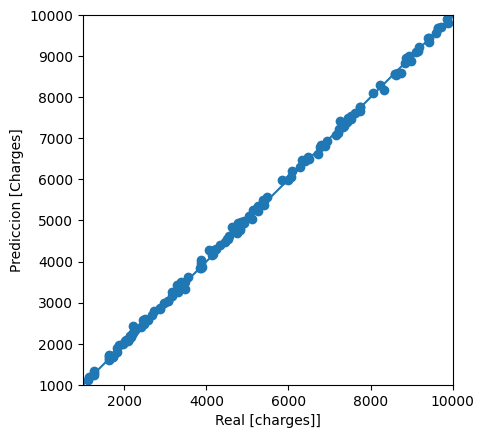

In [47]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('Real [charges]]')
plt.ylabel('Prediccion [Charges]')
lims = [1000, 10000]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

In [48]:
# Exportar el modelo
nn.save('modelo_regresion')
nn.save('modelo_regresion.h5')

INFO:tensorflow:Assets written to: modelo_regresion\assets


INFO:tensorflow:Assets written to: modelo_regresion\assets


In [55]:
#probar el modelo exportado con un nuevo conjunto de datos

model = tf.keras.models.load_model('modelo_regresion')
model.summary()
#age,bmi,children,sex_embedding_0,smoker_embedding_0,region_embedding_0,region_embedding_1,charges


predict = model.predict([51,43,1,0.031118,-1.249795,0.277756,-0.321266]).flatten()
print(predict)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 7)                15        
 ion)                                                            
                                                                 
 dense_18 (Dense)            (None, 32)                256       
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 64)                2112      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                      

1/1 [==============================] - 0s 96ms/step
[46700.754]
